<a href="https://colab.research.google.com/github/Kusanis/Sale-Data-Analysis/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Access the dataset from the uploaded file 'Data.csv'**

In [4]:
df = pd.read_csv('Data.csv')

**Analyze the data type of values as well as the number of missing values in each column**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [9]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

**Replace the missing values with the mean of the remaining values of each float type column**

In [10]:
df.rating.fillna(value=df.rating.mean(),inplace=True)

**Drop all those records with the missing values in object type columns**

In [11]:
df.dropna(axis=0,how='any',inplace=True)

**Verify whether there are any missing values left in the data**

In [12]:
df.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

**Drop unnecessary columns for efficient analysis**

In [14]:
df.drop(columns='description',inplace=True)
df.drop(columns='index',inplace=True)

**Conduct a descriptive statistical analysis of the data**

In [15]:
df.describe()

,sale_price,market_price,rating
count,27439.000000,27439.000000,27439.000000
mean,322.701129,382.238589,3.943171
std,486.857214,581.866963,0.612882
min,2.450000,3.000000,1.000000
25%,95.000000,100.000000,3.943410
50%,190.000000,220.000000,3.943410
75%,359.000000,425.000000,4.200000
max,12500.000000,12500.000000,5.000000


**Plot the distribution of rating**

<Axes: xlabel='rating', ylabel='Count'>

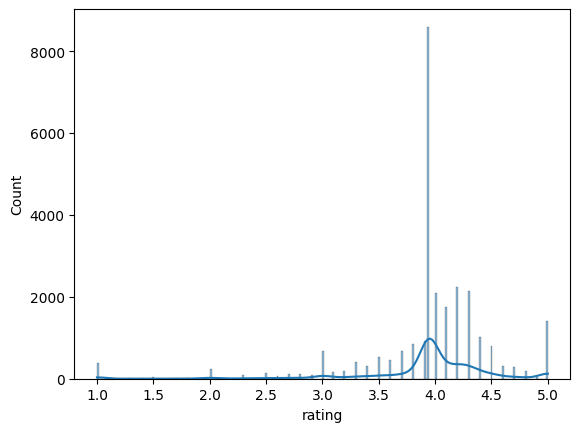

In [17]:
sns.histplot(df.rating,kde=True)

**Plot a barplot for top selling categories**

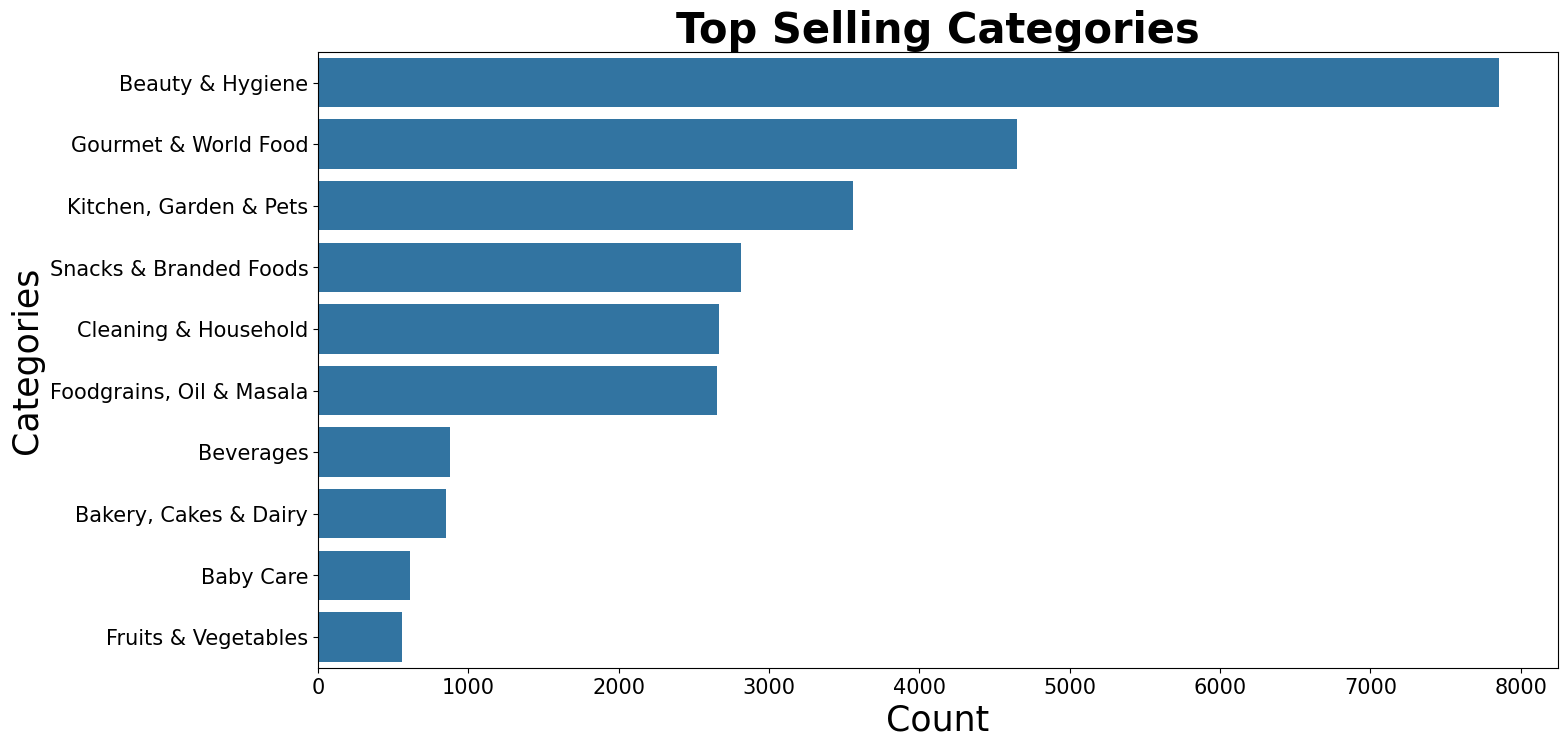

In [24]:
data = df.category.value_counts()[:10]
plt.figure(figsize=(16,8))
sns.barplot(x=data,y=data.index)
plt.xlabel('Count',fontdict={'fontsize': 25})
plt.ylabel('Categories',fontdict={'fontsize': 25})
plt.title('Top Selling Categories',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 15

**Contribution of each category to Total Revenue**

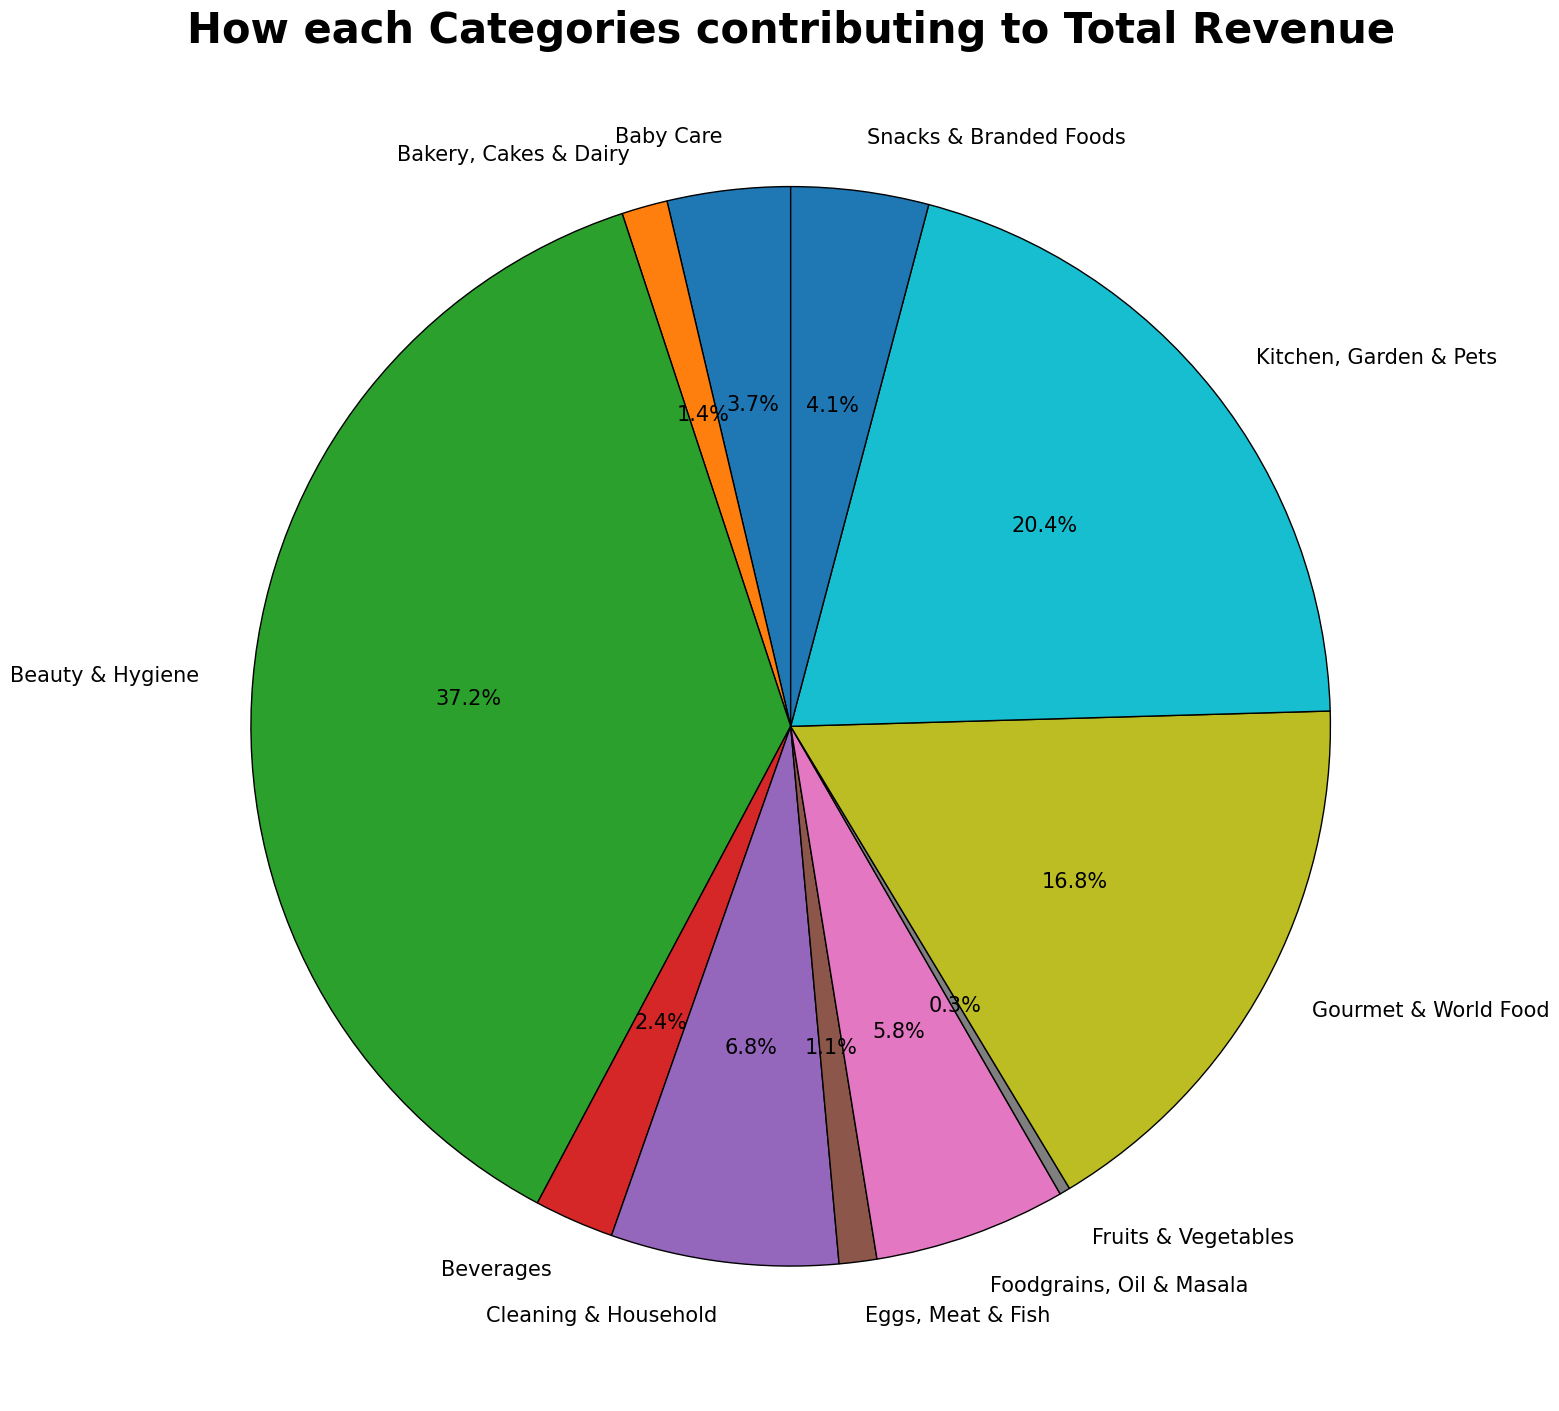

In [20]:
data = df.sale_price.groupby(df.category).sum()
plt.figure(figsize=(16,16))
plt.pie(x=data,labels=data.index,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('How each Categories contributing to Total Revenue',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 16
plt.tight_layout()

**Barplot of Top selling categories**

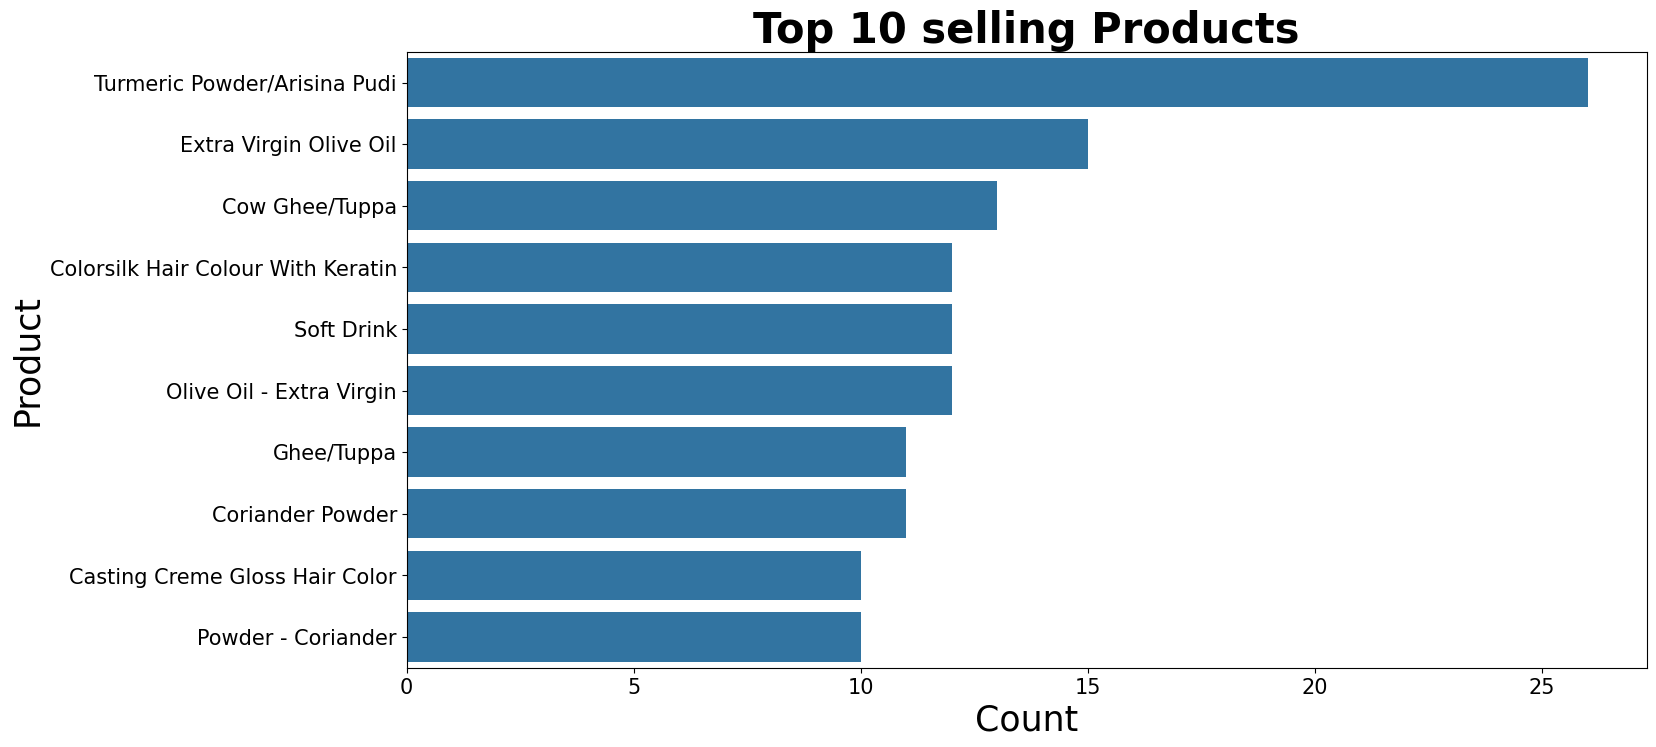

In [23]:
data = df['product'].value_counts()[:10]
plt.figure(figsize=(16,8))
sns.barplot(x=data,y=data.index)
plt.xlabel('Count',fontdict={'fontsize': 25})
plt.ylabel('Product',fontdict={'fontsize': 25})
plt.title('Top 10 selling Products',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 15

**Barplot of Top 10 brands**

In [25]:
counts = df['brand'].value_counts()
counts_df_brand = pd.DataFrame({'Brand Name':counts.index,'Counts':counts.values})[:10]
px.bar(
    data_frame=counts_df_brand,
    x='Brand Name',
    y='Counts',
    color='Counts',
    color_continuous_scale='blues',
    text_auto=True,
    title=f'Top 10 Brand Items based on Item Counts'
    )

**Top 5 Selling Products of a specific brand**

Enter the Brand:Fresho


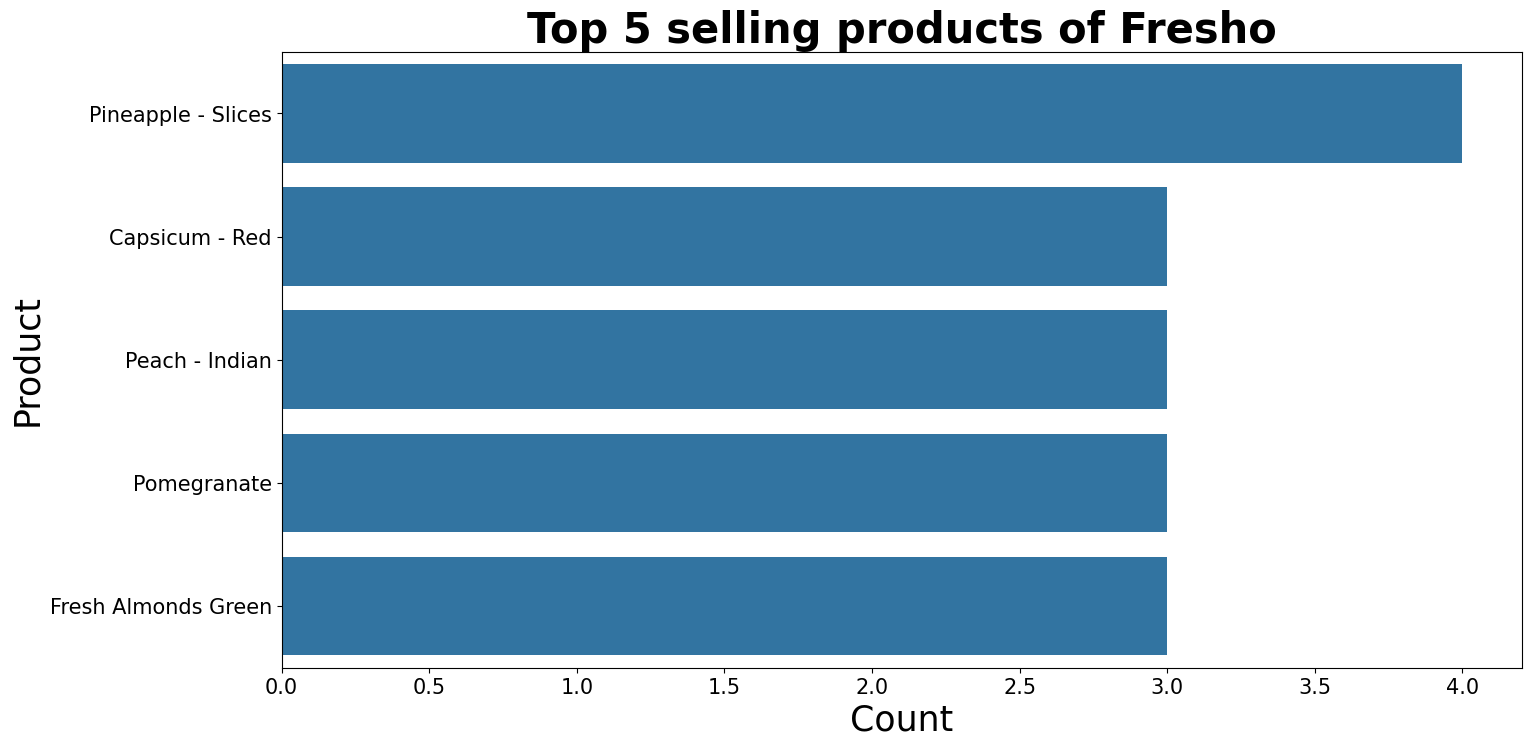

In [29]:
i = input("Enter the Brand:")
filtered_df = df.loc[df['brand']==i]
data = filtered_df['product'].value_counts()[:5]
plt.figure(figsize=(16,8))
sns.barplot(x=data,y=data.index)
plt.title(f"Top 5 selling products of {i}",fontweight="bold",fontdict={'fontsize': 30})
plt.xlabel('Count',fontdict={'fontsize': 25})
plt.ylabel('Product',fontdict={'fontsize': 25})
plt.rcParams['font.size'] = 15